In [1]:
import openmc
import numpy as np
import tokamak_radiation_environment as tre

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker

In [2]:
# plot = openmc.Plot()
# plot.basis = 'xz'
# plot.origin = (620, 0.0, 0.0)
# plot.width = (1200., 1400.)
# plot.pixels = (400, 400)


# iter_model = openmc.Model.from_model_xml("../reactors/iter_class/model.xml")
# iter_model.plots = [plot]
# geometry = iter_model.geometry
# iter_model.plot_geometry()


# fig, ax = plt.subplots(figsize=(8, 6))

# # Define a custom function to plot the geometry with transparency and black outlines
# def plot_geometry_with_transparency():
#     for cell in geometry.get_all_cells().values():
#         if cell.fill is not None:
#             # Extract the points of the cell's region
#             region = cell.region
#             if isinstance(region, openmc.Plane):
#                 points = region.plot(1)  # Use a resolution of 1 for simplicity

#                 # Plot the cell region with facecolor set to 'none' for transparency and edgecolor as black
#                 ax.add_patch(patches.Polygon(points, closed=True, fill=False, edgecolor='black'))
#         else:
#             # If the cell has no fill material, it is a void region, so we need to plot it too
#             region = cell.region
#             if isinstance(region, openmc.Plane):
#                 points = region.plot(1)  # Use a resolution of 1 for simplicity
#                 ax.add_patch(patches.Polygon(points, closed=True, fill=False, edgecolor='black'))

# # Call the custom plot function to plot the geometry
# plot_geometry_with_transparency()

# # Set the aspect ratio and limits for the plot
# ax.set_aspect('equal', adjustable='box')
# ax.set_xlim([xmin, xmax])  # Set your desired x-axis limits
# ax.set_ylim([ymin, ymax])  # Set your desired y-axis limits

# # Display the plot
# plt.show()

TypeError: Plot.__init__() got an unexpected keyword argument 'alpha'

In [ ]:
# load weight windows
iter_ww = openmc.wwinp_to_wws("../reactors/iter_class/weight_windows.cadis.wwinp")
arc_ww = openmc.wwinp_to_wws("../reactors/arc_class/weight_windows.cadis.wwinp")

In [ ]:
iter_eb = iter_ww[0].energy_bounds
iter_lb = iter_ww[0].lower_ww_bounds[:, 12, :, -2].T

arc_eb = arc_ww[0].energy_bounds
arc_lb = arc_ww[0].lower_ww_bounds[:, 12, :, -2].T

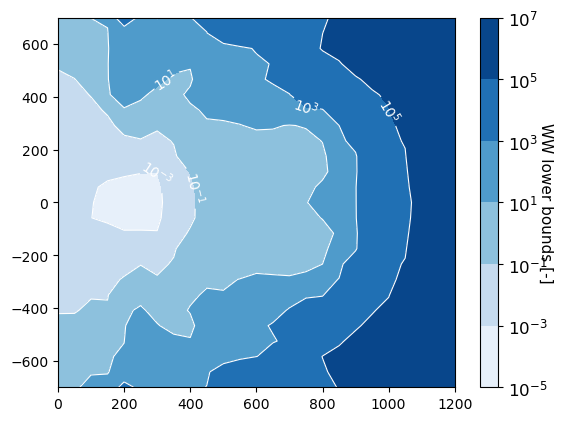

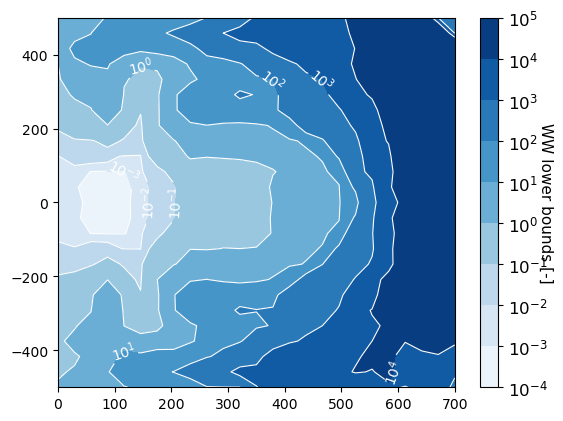

In [ ]:
x = np.linspace(0, 1200, 25)
z = np.linspace(-700, 700, 25)

fig, ax1 = plt.subplots()
fmt = ticker.LogFormatterSciNotation()
fmt.create_dummy_axis()
p1 = ax1.contourf(x, z, iter_lb, norm=LogNorm(), cmap='Blues')
p2 = ax1.contour(x, z, iter_lb, norm=LogNorm(), colors='w', linewidths=.8)
ax1.clabel(p2, fontsize=10, colors='w', fmt=fmt)
cbar1 = fig.colorbar(p1, ax=ax1)
cbar1.ax.tick_params(labelsize=12)
cbar1.ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())
cbar1.set_label('WW lower bounds [-]', rotation=270, fontsize=11)


x = np.linspace(0, 700, 25)
z = np.linspace(-500, 500, 25)

fig, ax1 = plt.subplots()
fmt = ticker.LogFormatterSciNotation()
fmt.create_dummy_axis()
p1 = ax1.contourf(x, z, arc_lb, norm=LogNorm(), cmap='Blues')
p2 = ax1.contour(x, z, arc_lb, norm=LogNorm(), colors='w', linewidths=.8)
ax1.clabel(p2, fontsize=10, colors='w', fmt=fmt)
cbar1 = fig.colorbar(p1, ax=ax1)
cbar1.ax.tick_params(labelsize=12)
cbar1.ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())
cbar1.set_label('WW lower bounds [-]', rotation=270, fontsize=11)

In [ ]:
iter_sp = openmc.StatePoint("../reactors/iter_class/statepoint.005.h5")
# arc_sp = openmc.StatePoint("../reactors/arc_class/statepoint.005.h5")

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '../reactors/iter_class/statepoint.010.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
iter_tfcoil_spectrum = iter_sp.get_tally(id=4)
# arc_tfcoil_spectrum = arc_sp.get_tally(id=4)

iter_spectrum_mean = iter_tfcoil_spectrum.mean[:,0,0]
# arc_spectrum_mean = arc_tfcoil_spectrum.mean[:,0,0]

iter_spectrum_stddev = iter_tfcoil_spectrum.std_dev[:,0,0]
# arc_spectrum_stddev = arc_tfcoil_spectrum.std_dev[:,0,0]

ebins = iter_tfcoil_spectrum.filters[2].bins[:,0]

In [ ]:
iter_gas_production = iter_sp.get_tally(id=3).get_pandas_dataframe()
# arc_gas_production = arc_sp.get_tally(id=3).get_pandas_dataframe()

print(iter_gas_production)
# print(arc_gas_production)

In [ ]:
hfir = np.loadtxt('../reactors/ornl_hfir/spectrum.txt')
hfir_ebins = np.flipud(hfir[:1102])
hfir_spectrum = np.flipud(hfir[1103:])
plt.loglog(hfir_ebins, hfir_spectrum)

In [ ]:
fig, ax = plt.subplots()
ax.plot(ebins, iter_spectrum_mean, drawstyle='steps-pre')
# ax.plot(ebins, arc_spectrum_mean, drawstyle='steps-pre')
# ax.plot(hfir_ebins, hfir_spectrum/sum(hfir_spectrum), drawstyle='steps-pre')
ax.set_xlim(1e-2, 5e7)
ax.set_ylim(1e-11, 1e-3)
# ax.set_xlim(1e6, 2e7)
# ax.set_ylim(1e-5, 1e-3)
ax.set_xscale('log')
ax.set_yscale('log')
print(sum(iter_spectrum_mean), sum(arc_spectrum_mean))

In [ ]:
plt.loglog(iter_tfcoil_spectrum.std_dev[:,0,0] / iter_tfcoil_spectrum.mean[:,0,0])
# plt.loglog(arc_tfcoil_spectrum.std_dev[:,0,0] / arc_tfcoil_spectrum.mean[:,0,0])

In [ ]:
# Specify the materials you want to plot cross sections for
ybco = tre.materials.ybco
nb3sn = tre.materials.nb3sn

# Use openmc.plot_xs to create the cross section plots
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
openmc.plot_xs(nb3sn, ['(n,Xa)', '(n,Xp)', '(n,Xd)', '(n,Xt)'], axis=ax1, c=['k', 'k','k','k'])
# openmc.plot_xs(ybco, ['(n,Xa)'], axis=ax1, c='k')
ax2.plot(ebins, iter_tfcoil_spectrum.mean[:,0,0], lw=2, ls='-', c='k')
ax2.plot(ebins, arc_tfcoil_spectrum.mean[:,0,0], lw=2, ls='--', c='k')
# ax2.plot(hfir_ebins, hfir_spectrum/sum(hfir_spectrum), lw=2, ls=':', c='k')
ax1.set_xlim(1e-1, 2e7), ax2.set_xlim(1e-1, 2e7)
ax1.set_ylim(1e-11, 1e-1), ax2.set_ylim(1e-11, 1e-1)
ax1.set_xscale('log'), ax2.set_xscale('log')
ax1.set_yscale('log'), ax2.set_yscale('log')
ax2.set_ylabel('')